In [22]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
%matplotlib inline

In [23]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

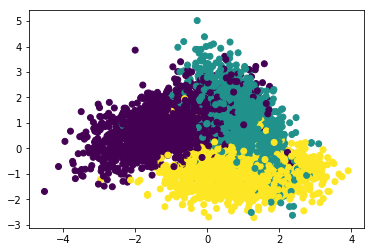

In [24]:
X, y = datasets.make_classification(n_samples=5000, n_classes=3, \
                                    n_clusters_per_class=1, n_features=2, \
                                    n_informative=2, n_redundant=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [28]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [29]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (12, 5))
    
    #plot decision surface on the train data 
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    plt.show()
    #plot decision surface on the test data
    plt.figure(figsize = (12, 5))
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    plt.show()

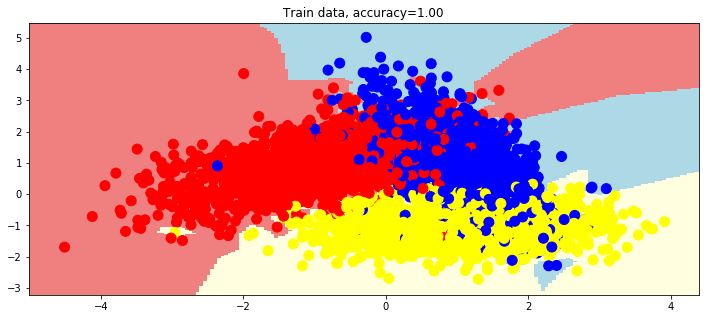

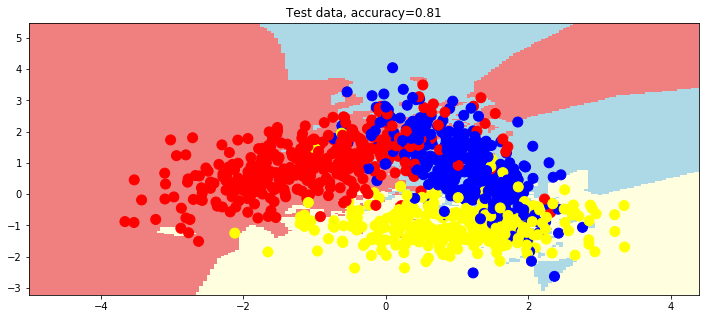

In [33]:
estimator = KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, X[:-1000], y[:-1000], X[-1000:], y[-1000:])

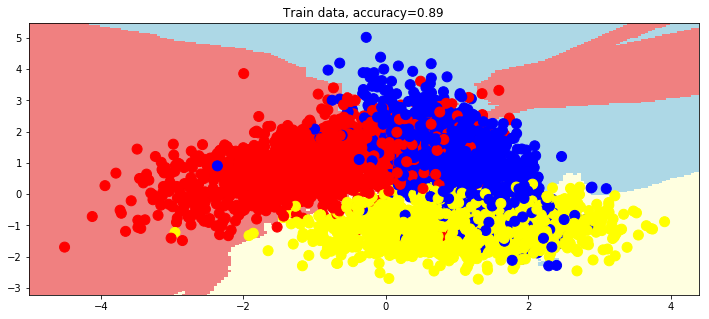

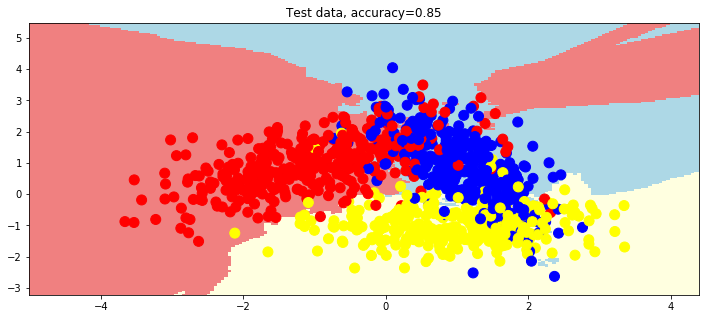

In [34]:
estimator = KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, X[:-1000], y[:-1000], X[-1000:], y[-1000:])

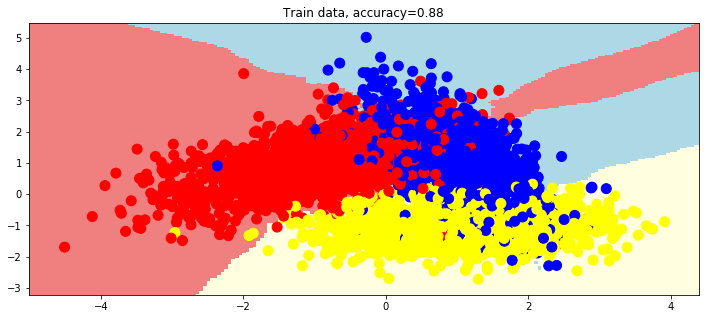

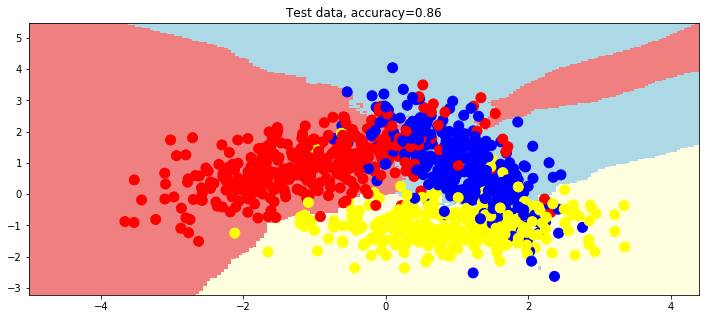

In [35]:
estimator = KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, X[:-1000], y[:-1000], X[-1000:], y[-1000:])

In [36]:
scores = []
ns_neighbors = np.arange(1, 50)
for n_neighbors in ns_neighbors:
    scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=n_neighbors), \
                                 X, y, cv=5).mean())

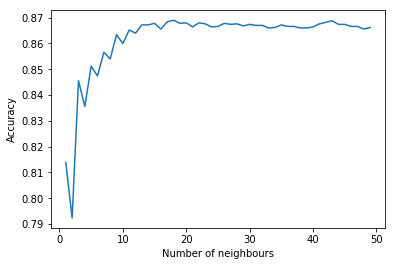

In [37]:
plt.plot(ns_neighbors, scores)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [38]:
best_n = ns_neighbors[np.argmax(scores)]
print ('Best value of n_neighbours:', best_n)

knn_class = KNeighborsClassifier(n_neighbors=best_n).fit(X[:-1000], y[:-1000])
print ('Best score:', knn_class.score(X[-1000:], y[-1000:]))

Best value of n_neighbours: 18
Best score: 0.866
